In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

dataframe = pd.read_csv('DSCancerDeMamaSinDatosPerdidos.csv',sep=';')
clasificadores = ['Benigno','Maligno']

In [2]:
dataframe.head(10)

,BIRADS,Edad,Forma,Margen,Densidad,Resultado
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
5,3,42,2,1,3,1
6,4,36,3,1,2,0
7,4,60,2,1,2,0
8,4,54,1,1,3,0
9,3,52,3,4,3,0


In [3]:
dataframe.groupby('Resultado').size()

Resultado
0    427
1    403
dtype: int64

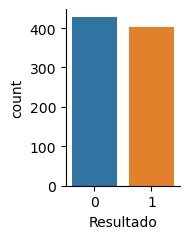

In [4]:
sb.catplot(x = 'Resultado',data=dataframe,kind="count",height=2.5,aspect=.8)

In [5]:
y = dataframe['Resultado']
x = dataframe.drop('Resultado',axis=1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=5)

#Entrenar el algoritmo
knn_mm.fit(x_train,y_train)
predicciones = knn_mm.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

labels = ["Benigno","Maligno"]
matriz = confusion_matrix(y_test,predicciones, labels=[0,1])
print(pd.DataFrame(matriz, index = labels, columns = labels))


#print(tn, fp, fn, tp)
#sb.heatmap(confusion_matrix(y_test,predicciones), annot=True, fmt="d")
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('True')

print(classification_report(y_test,predicciones,target_names=clasificadores))

         Benigno  Maligno
Benigno      105       22
Maligno       22      100
              precision    recall  f1-score   support

     Benigno       0.83      0.83      0.83       127
     Maligno       0.82      0.82      0.82       122

    accuracy                           0.82       249
   macro avg       0.82      0.82      0.82       249
weighted avg       0.82      0.82      0.82       249



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
#BIRADS	Edad	Forma	Margen	Densidad
print(knn_mm.predict([[4,65,3,5,3]]))
print(knn_mm.predict_proba([[4,65,3,5,3]]))

print(knn_mm.predict([[3,30,2,4,3]]))
print(knn_mm.predict_proba([[3,30,2,4,3]]))

print(knn_mm.predict([[5,70,3,5,3]]))
print(knn_mm.predict_proba([[5,70,3,5,3]]))

print(knn_mm.predict([[5,20,2,1,2]]))
print(knn_mm.predict_proba([[5,20,2,1,2]]))

print(knn_mm.predict([[2,70,1,2,4]]))
print(knn_mm.predict_proba([[2,70,1,2,4]]))

print(knn_mm.predict([[5,30,1,5,2]]))
print(knn_mm.predict_proba([[5,30,1,5,2]]))

print(knn_mm.predict([[4,65,1,2,3]]))
print(knn_mm.predict_proba([[4,65,1,2,3]]))

[1]
[[0.2 0.8]]
[0]
[[0.8 0.2]]
[1]
[[0.2 0.8]]
[0]
[[1. 0.]]
[1]
[[0.4 0.6]]
[0]
[[0.6 0.4]]
[0]
[[0.6 0.4]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X doe